In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 3.4 MB/s 
     |████████████████████████████████| 3.1 MB 8.6 MB/s 
     |████████████████████████████████| 3.3 MB 40.4 MB/s 
     |████████████████████████████████| 1.2 MB 34.9 MB/s 
     |████████████████████████████████| 59 kB 6.5 MB/s 
     |████████████████████████████████| 596 kB 35.7 MB/s 
     |████████████████████████████████| 895 kB 37.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=fbe040acd72d5f577e321735611a30a44816eaee106a7059d2bd371851cf40f3
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from skimage.transform import resize

from sklearn.metrics import roc_curve, auc

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil
import cv2
from os import listdir
from os.path import isfile, join
import string
import re
import nltk
from keras import layers
from keras import Input
from keras.models import Model
from keras import models

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

In [ ]:
#Dataset preparation
import json
import pandas as pd

path = '/content/drive/MyDrive/ALDA_project/Training_dataset/'
testing_path = '/content/drive/MyDrive/ALDA_project/test_set/'

# LOAD THE DATASET
train_df = pd.read_csv(path + 'devset_images_gt.csv')
train_df.columns=(['image_id', 'label'])
train_df["image_id"] = train_df["image_id"].astype(str)

test_df = pd.read_csv(testing_path + 'testset_images_gt.csv')
test_df.columns=(['image_id', 'label'])
test_df["image_id"] = test_df["image_id"].astype(str)

train_df = train_df[train_df.columns[[0, 1]]]
test_df = test_df[test_df.columns[[0, 1]]] 

print("Training data\n", train_df.head())
print("\n")
print("Sample_Image\n ",train_df.iloc[1])

Training data
      image_id  label
0  4896119055      0
1  3468473862      0
2  4120853942      0
3  4436083254      0
4  4687941690      0


Sample_Image
  image_id    3468473862
label                0
Name: 1, dtype: object


In [ ]:
train_df.head()

,image_id,label
0,4896119055,0
1,3468473862,0
2,4120853942,0
3,4436083254,0
4,4687941690,0


In [ ]:
dim = (224, 224)
X_image_train = []
y_train = []

train_image_path = path + 'devset_images/'
for index,row in train_df.iterrows():
    try:
      fpath = os.path.join(train_image_path, row['image_id']+'.jpg')
      im = cv2.imread(fpath)
      im_resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
      X_image_train.append(im_resized)
      y_train.append(row['label'])
    except:
          print('File not found. Check the name of file. ', row[0])

File not found. Check the name of file.  3458255758
File not found. Check the name of file.  5968047189
File not found. Check the name of file.  4355060977
File not found. Check the name of file.  9892658854
File not found. Check the name of file.  8238634118
File not found. Check the name of file.  7370874908
File not found. Check the name of file.  12175187445
File not found. Check the name of file.  3246368752
File not found. Check the name of file.  2583620603
File not found. Check the name of file.  9740979005
File not found. Check the name of file.  4421805350
File not found. Check the name of file.  8334177117
File not found. Check the name of file.  6627602249
File not found. Check the name of file.  4206386916
File not found. Check the name of file.  8090836475


In [ ]:
dim = (224, 224)
X_image_test = []
y_test = []
nf_test = []

test_image_path = testing_path + 'testset_images/'
for index,row in test_df.iterrows():
    try:
      fpath = os.path.join(test_image_path, row['image_id']+'.jpg')
      im = cv2.imread(fpath)
      im_resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
      X_image_test.append(im_resized)
      y_test.append(row['label'])
    except:
          print('File not found. Check the name of file. ', row[0])
          nf_test.append(str(row[0]))

File not found. Check the name of file.  5847540163
File not found. Check the name of file.  9567943158


In [ ]:
X_image_test = np.array(X_image_test)
y_test       = np.array(y_test)

In [ ]:
X_image_train = np.array(X_image_train)
y_train       = np.array(y_train)

In [ ]:
import json
import pandas as pd

path = '/content/drive/MyDrive/ALDA_project/Training_dataset/'
testing_path = '/content/drive/MyDrive/ALDA_project/test_set/'

#Load the training dataset using metadata and label data.
train_df = pd.read_csv(path + 'devset_images_gt.csv')
train_df.columns=(['image_id', 'label'])
train_df["image_id"] = train_df["image_id"].astype(str)
train_df = train_df[train_df.columns[[0, 1]]]

json_filename = path + "devset_images_metadata.json"
with open(json_filename) as json_file:
    data = json.load(json_file)

required_columns = ['description', 'user_tags', 'image_id', 'title']
json_df = pd.DataFrame(data['images'], columns = required_columns)
print(json_df.head())
#merge label and json dataframes
train_df = pd.merge(train_df, json_df, how='inner')
train_df.head()


#Load the testing dataset using metadata and label data.
test_df = pd.read_csv(testing_path + 'testset_images_gt.csv')
test_df.columns=(['image_id', 'label'])
test_df["image_id"] = test_df["image_id"].astype(str)
test_df = test_df[test_df.columns[[0, 1]]]

json_filename = testing_path + "testset_images_metadata.json"
with open(json_filename) as json_file:
    data = json.load(json_file)

required_columns = ['description', 'user_tags', 'image_id', 'title']
json_df = pd.DataFrame(data['images'], columns = required_columns)
#merge label and json dataframes
test_df = pd.merge(test_df, json_df, how='inner')
test_df.head()

nf_train = ['3458255758','5968047189','4355060977','9892658854','8238634118','7370874908','12175187445','3246368752','2583620603','9740979005','4421805350','8334177117','6627602249','4206386916','8090836475']

train_df = train_df[~train_df['image_id'].isin(nf_train)]
test_df = test_df[~test_df['image_id'].isin(nf_test)]
train_df = train_df.drop(columns=['user_tags','image_id'])
test_df = test_df.drop(columns=['user_tags','image_id'])
train_df = train_df.fillna(" ")
test_df = test_df.fillna(" ")

X_text_train = train_df[['description', 'title']]
y_text_train = train_df['label'].tolist()
X_text_test = test_df[['description', 'title']]
y_text_test = test_df['label'].tolist()

                                         description  ...                   title
0                                               None  ...         Biltmore Estate
1                                               None  ...             Chand Minar
2  After the flood, the boarded up stores bear up...  ...      Uplifting Graffiti
3                                               None  ...                DSCF6487
4                                               None  ...  Oconoe river - flooded

[5 rows x 4 columns]


In [ ]:
#Generating the embeddings for description and title
sentence_embeddings_description_train = model.encode(X_text_train.loc[:,'description'].tolist())
sentence_embeddings_title_train = model.encode(X_text_train.loc[:,'title'].tolist())
sentence_embeddings_description_test = model.encode(X_text_test.loc[:,'description'].to_list())
sentence_embeddings_title_test = model.encode(X_text_test.loc[:,'title'].to_list())

In [ ]:
#Concatenating the embeddings
X_text_train = []
for i in range(len(sentence_embeddings_description_train)):
  X_text_train.append(sentence_embeddings_description_train[i].tolist() + sentence_embeddings_title_train[i].tolist())
X_text_test = []
for i in range(len(sentence_embeddings_description_test)):
  X_text_test.append(sentence_embeddings_description_test[i].tolist() + sentence_embeddings_title_test[i].tolist())

In [ ]:
X_text_test = np.array(X_text_test)
y_text_test       = np.array(y_text_test)
X_text_train = np.array(X_text_train)
y_text_train       = np.array(y_text_train)

In [ ]:
X_text_test.shape

(1317, 1536)

In [ ]:
from tensorflow.keras.applications import InceptionV3

image_input = Input(shape=(224, 224, 3), name='image')
inception = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))(image_input)
x = layers.Flatten()(inception) 
x = layers.Dense(256, activation='relu')(x)

In [ ]:
!pip install bert-for-tf2

     |████████████████████████████████| 41 kB 126 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=4ce1e6f72c5bbbc76b634cbe86239a9dad5dd6fd97782fa81943d5f15740df3d
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19473 sha256=a845022f48ff67777dccbbd8884fe1fff624a76f7bb36b7b0e9f93cb390ee581
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7912 sha256=09a6c3c6aa53af8bfd98d4a3b8dd20cbd0318247d1ecf41935b7441d46c0a508
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f22da43ddf9969716
Successfully built bert-for-tf2 params-flow py-params


In [ ]:
!pip install sentencepiece

In [ ]:
from keras.layers import Bidirectional, BatchNormalization
import tensorflow as tf
import tensorflow_hub as hub
import bert
from tensorflow.keras.models import  Model
from tqdm import tqdm
import numpy as np
from collections import namedtuple

In [ ]:
bert_layer_1=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",trainable=False)
bert_layer_2=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",trainable=False)

MAX_SEQ_LEN=128
input_word_ids_1 = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                       name="input_word_ids_1")
input_mask_1 = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                   name="input_mask_1")
segment_ids_1 = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                    name="segment_ids_1")

pooled_output_1, sequence_output_1 = bert_layer_1([input_word_ids_1, input_mask_1, segment_ids_1])

input_word_ids_2 = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                       name="input_word_ids_2")
input_mask_2 = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                   name="input_mask_2")
segment_ids_2 = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                    name="segment_ids_2")
pooled_output_2, sequence_output_2 = bert_layer_2([input_word_ids_2, input_mask_2, segment_ids_2])




In [ ]:
concat_embeddings = Concatenate()([sequence_output_1, sequence_output_2])

In [ ]:
bd_layer = (Bidirectional(LSTM(128)))(concat_embeddings)
# dense_layer_1 = Dense(512, activation='relu')(embeddings_input)
# dense_layer_2 = Dense(256, activation='relu')(dense_layer_1)

In [ ]:
import tensorflow as tf
concat_layer = Concatenate()([x, bd_layer])
dense_layer_fin = Dense(10, activation='relu')(concat_layer)
out = Dense(2, activation='softmax')(dense_layer_fin)
model = tf.keras.models.Model(
      inputs=[image_input, [input_word_ids_1, input_mask_1, segment_ids_1],[input_word_ids_2, input_mask_2, segment_ids_2]], outputs=out)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

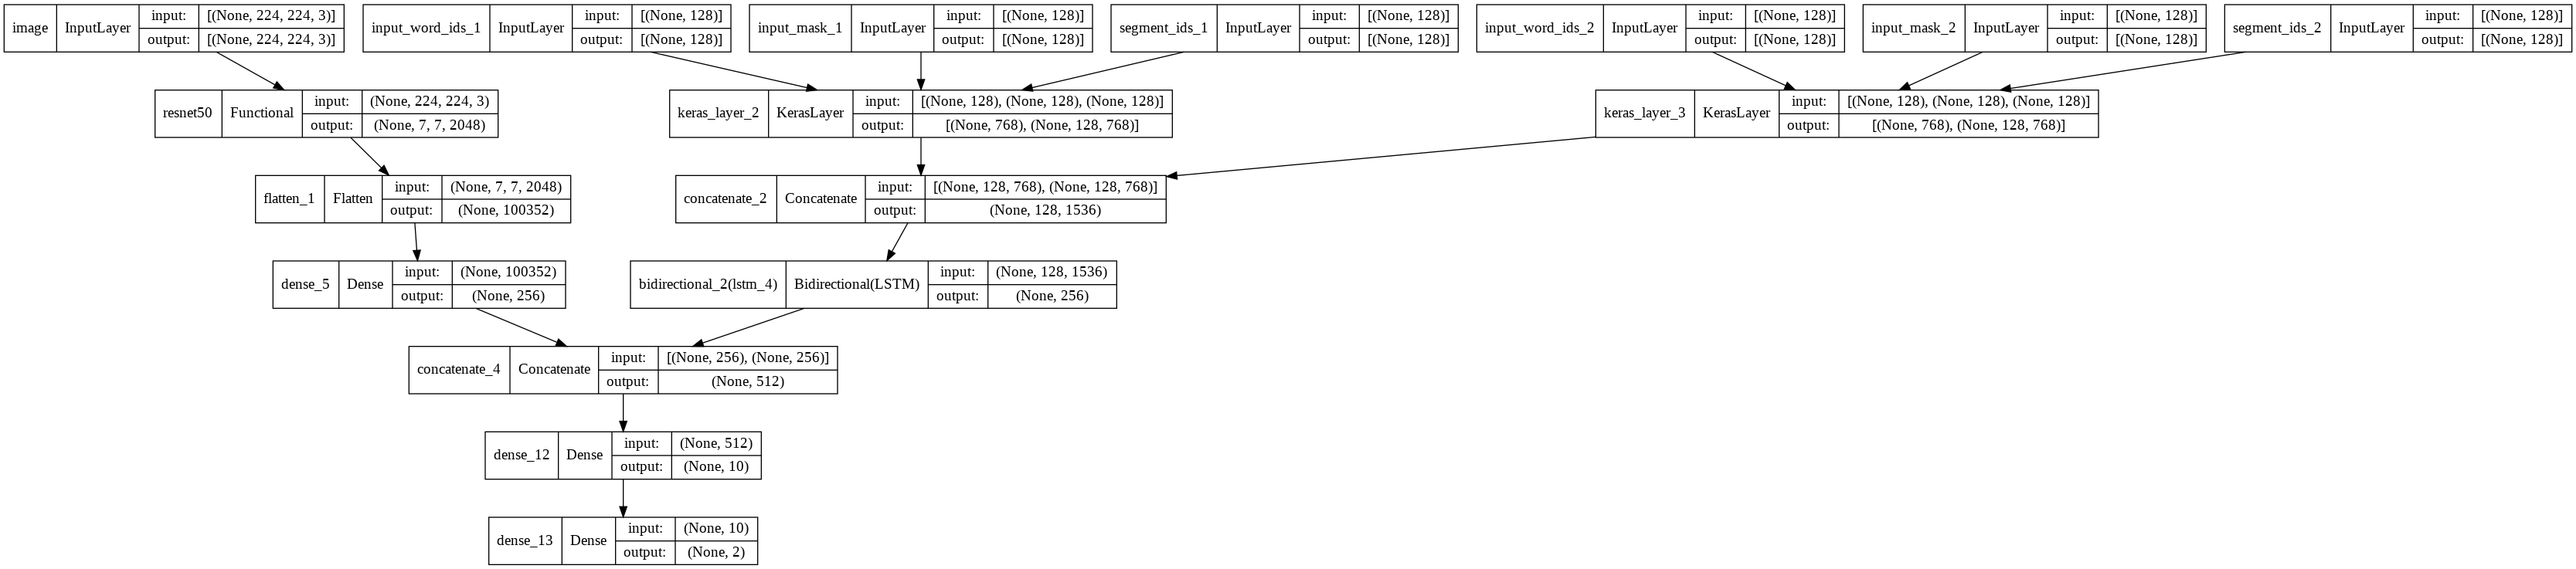

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


y_train = label_encoder.fit_transform(y_train)
# y_test = label_encoder.fit_transform(y_test['label'])


from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

ValueError: ignored

In [ ]:
FullTokenizer=bert.bert_tokenization.FullTokenizer

vocab_file=bert_layer_1.resolved_object.vocab_file.asset_path.numpy()

do_lower_case=bert_layer_1.resolved_object.do_lower_case.numpy()

tokenizer_1=FullTokenizer(vocab_file,do_lower_case)

FullTokenizer=bert.bert_tokenization.FullTokenizer

vocab_file=bert_layer_2.resolved_object.vocab_file.asset_path.numpy()

do_lower_case=bert_layer_2.resolved_object.do_lower_case.numpy()

tokenizer_2=FullTokenizer(vocab_file,do_lower_case)

def get_masks(tokens, max_seq_length):
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))

def get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))
def get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens,)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

def create_single_input(sentence,tokenizer,MAX_LEN):
  
  stokens = tokenizer.tokenize(sentence)
  
  stokens = stokens[:MAX_LEN]
  
  stokens = ["[CLS]"] + stokens + ["[SEP]"]
 
  ids = get_ids(stokens, tokenizer, MAX_SEQ_LEN)
  masks = get_masks(stokens, MAX_SEQ_LEN)
  segments = get_segments(stokens, MAX_SEQ_LEN)

  return ids,masks,segments

def create_input_array(sentences,tokenizer):

  input_ids, input_masks, input_segments = [], [], []

  for sentence in tqdm(sentences,position=0, leave=True):
  
    ids,masks,segments=create_single_input(sentence,tokenizer,MAX_SEQ_LEN-2)

    input_ids.append(ids)
    input_masks.append(masks)
    input_segments.append(segments)

  return [np.asarray(input_ids, dtype=np.int32), 
            np.asarray(input_masks, dtype=np.int32), 
            np.asarray(input_segments, dtype=np.int32)]

In [ ]:
inputs_1=create_input_array(train_df['description'], tokenizer_1)
inputs_2=create_input_array(train_df['title'], tokenizer_2)

100%|██████████| 5264/5264 [00:00<00:00, 9116.13it/s]


In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
model.fit([X_image_train[0:10],inputs_1[0:10], inputs_2[0:10]],y_train[0:10],epochs=1,batch_size=1,validation_split=0.1,shuffle=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


ResourceExhaustedError: ignored

In [ ]:
y_pred1 = model.predict([X_image_test, X_text_test])
y_pred = np.argmax(y_pred1, axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


              precision    recall  f1-score   support

           0       0.64      1.00      0.78       839
           1       0.00      0.00      0.00       478

    accuracy                           0.64      1317
   macro avg       0.32      0.50      0.39      1317
weighted avg       0.41      0.64      0.50      1317



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
